# Backtest

In [1]:
import os, time, logging
from datetime import date, datetime, timedelta

import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [2]:
from technicals import TechnicalAnalysis
import data.marketdata.alpaca as api
import data.io.twilio as tw

In [3]:
import matplotlib.pyplot as plt

In [4]:
api_key_path = '../resources/api_keys.env'

In [5]:
tickers=['SYK','C','MSFT']
ohlcv = api.ohlcv(tickers=tickers, api_key_path=api_key_path)

In [6]:
technicals = TechnicalAnalysis(ohlcv)

Open price data for C


<AxesSubplot:xlabel='time'>

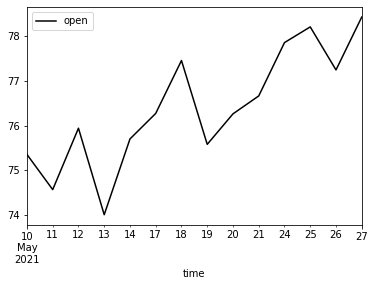

In [7]:
print(f"Open price data for {technicals.tickers()[0]}")
technicals._open(ticker=technicals.tickers()[0]).tail(14).plot(color='black')

### *Backtesting Williams %R*

#### Test class method

In [8]:
# set backtest bounds logic
wr_rules = {'long' : -80,
             'short' : -70}

# set Williams %R range
wr_range = 10

# set cash position and tracker
seed_cash = 1000000.0

In [14]:
backtest_test = technicals.wr_backtest(ticker = 'SYK',
                                       start_date = '2018-01-01',
                                       end_date = '2021-05-01',
                                       wr_rules = wr_rules,
                                       seed_cash = seed_cash,
                                       wr_range=wr_range)

In [15]:
backtest_test.head()

,time,close,wr,pos,stock_value,shares,cash,Hold,Trade
0,2020-01-16 00:00:00-05:00,209.43,-48.728246,False,0,0,1000000,1.000000e+06,1000000
1,2020-01-17 00:00:00-05:00,212.12,-40.347667,False,0,0,1000000,1.012844e+06,1000000
2,2020-01-21 00:00:00-05:00,214.62,-17.474840,False,0,0,1000000,1.024782e+06,1000000
3,2020-01-22 00:00:00-05:00,217.09,-6.433225,False,0,0,1000000,1.036575e+06,1000000
4,2020-01-23 00:00:00-05:00,216.29,-16.484375,False,0,0,1000000,1.032756e+06,1000000


In [16]:
# Additional processing
init_hold_shares = backtest_test.iloc[0]['cash']/backtest_test.iloc[0]['close']

# parse data
backtest_test = backtest_test.set_index('time')

# process results data
hold_return = (backtest_test['Hold'][-1]-backtest_test['Hold'][0])/backtest_test['Hold'][0]
trade_return = (backtest_test['Trade'][-1]-backtest_test['Trade'][0])/backtest_test['Trade'][0]
delta_return = trade_return - hold_return
pct_delta_return = (trade_return - hold_return)/hold_return


print(f'hold_return_pct = {round(hold_return,2)}')
print(f'trade_return_pct = {round(trade_return,2)}')
print(f'delta_return = {round(delta_return,2)}')
print(f'delta_return_pct_diff = {round(pct_delta_return,2)}')

hold_return_pct = 0.21
trade_return_pct = 0.36
delta_return = 0.15
delta_return_pct_diff = 0.75


<AxesSubplot:xlabel='time'>

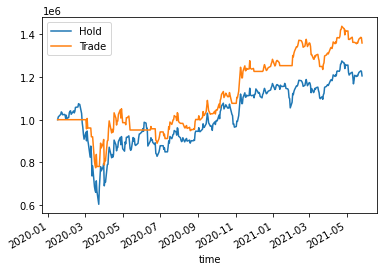

In [17]:
backtest_test[['Hold','Trade']].plot()